$\mapsto$ **LINK PARA O DATASET**:
[Clique Aqui!](https://www.kaggle.com/apoorvaappz/global-super-store-dataset?select=Global_Superstore2.csv)

# **Dataset:** Dados de pedidos de uma Loja global de vendas Online de 2011 a 2014.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%load_ext google.colab.data_table     
# Formatação de tabelas                    
pd.options.display.float_format = '{:,.2f}'.format      
# Formatação de valores float

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
df = pd.read_excel('/content/Global_Superstore2.xlsx')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,"10,024.00",US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"2,309.65",7,0.00,762.18,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,nan,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","3,709.39",9,0.10,-288.76,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,nan,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID","5,175.17",9,0.10,919.97,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,nan,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless","2,892.51",5,0.10,-96.54,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,nan,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed","2,832.96",8,0.00,311.52,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,nan,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.00,4.50,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,"77,095.00",US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.44,1,0.80,-1.11,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,"93,030.00",US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.92,3,0.00,11.23,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,nan,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.00,2.40,0.00,Medium


# ETAPA 1: ETL

In [ ]:
#Limpando colunas especificas.
df = df.drop(axis=1, columns=['Row ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name',
                              'City','State','Market','Product ID','Product Name','Shipping Cost',
                              'Order Priority', 'Postal Code'])
df

,Order ID,Ship Mode,Segment,Country,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2012-124891,Same Day,Consumer,United States,East,Technology,Accessories,"2,309.65",7,0.00,762.18
1,IN-2013-77878,Second Class,Corporate,Australia,Oceania,Furniture,Chairs,"3,709.39",9,0.10,-288.76
2,IN-2013-71249,First Class,Consumer,Australia,Oceania,Technology,Phones,"5,175.17",9,0.10,919.97
3,ES-2013-1579342,First Class,Home Office,Germany,Central,Technology,Phones,"2,892.51",5,0.10,-96.54
4,SG-2013-4320,Same Day,Consumer,Senegal,Africa,Technology,Copiers,"2,832.96",8,0.00,311.52
...,...,...,...,...,...,...,...,...,...,...,...
51285,IN-2014-62366,Same Day,Corporate,Japan,North Asia,Office Supplies,Fasteners,65.10,5,0.00,4.50
51286,US-2014-102288,Standard Class,Consumer,United States,Central,Office Supplies,Appliances,0.44,1,0.80,-1.11
51287,US-2013-155768,Same Day,Home Office,United States,West,Office Supplies,Envelopes,22.92,3,0.00,11.23
51288,MX-2012-140767,Standard Class,Home Office,Brazil,South,Office Supplies,Binders,13.44,2,0.00,2.40


In [ ]:
df.head(5) 

,Order ID,Ship Mode,Segment,Country,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2012-124891,Same Day,Consumer,United States,East,Technology,Accessories,"2,309.65",7,0.00,762.18
1,IN-2013-77878,Second Class,Corporate,Australia,Oceania,Furniture,Chairs,"3,709.39",9,0.10,-288.76
2,IN-2013-71249,First Class,Consumer,Australia,Oceania,Technology,Phones,"5,175.17",9,0.10,919.97
3,ES-2013-1579342,First Class,Home Office,Germany,Central,Technology,Phones,"2,892.51",5,0.10,-96.54
4,SG-2013-4320,Same Day,Consumer,Senegal,Africa,Technology,Copiers,"2,832.96",8,0.00,311.52


In [ ]:
df['Ship Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

In [ ]:
df['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [ ]:
df['Region'].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [ ]:
df['Country'].value_counts()

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Burundi             2
Chad                2
Eritrea             2
Swaziland           2
South Sudan         2
Name: Country, Length: 147, dtype: int64

In [ ]:
df['Category'].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [ ]:
df['Sub-Category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

## Descritivo breve sobre cada variável (Coluna) do seu dataset (citar a type / unidade):

In [ ]:
#Qual o tipo do objeto temos por coluna
print('\nTipos dos dados por Coluna:\n', df.dtypes)


Tipos dos dados por Coluna:
 Order ID         object
Ship Mode        object
Segment          object
Country          object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


## Descritivo breve das variáveis: Quantitativas e Qualitativas do seu dataset.

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      51290 non-null  object 
 1   Ship Mode     51290 non-null  object 
 2   Segment       51290 non-null  object 
 3   Country       51290 non-null  object 
 4   Region        51290 non-null  object 
 5   Category      51290 non-null  object 
 6   Sub-Category  51290 non-null  object 
 7   Sales         51290 non-null  float64
 8   Quantity      51290 non-null  int64  
 9   Discount      51290 non-null  float64
 10  Profit        51290 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.3+ MB


In [ ]:
print('Total de Linhas x Colunas: ', df.shape)
print('\nQuantidade de elementos: ', df.size)
print('\nColunas: ', df.columns)

Total de Linhas x Colunas:  (51290, 11)

Quantidade de elementos:  564190

Colunas:  Index(['Order ID', 'Ship Mode', 'Segment', 'Country', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


## Descritivo breve das variáveis: Quantitativas e Qualitativas do seu dataset.

In [ ]:
df.describe()

,Sales,Quantity,Discount,Profit
count,"51,290.00","51,290.00","51,290.00","51,290.00"
mean,246.49,3.48,0.14,28.61
std,487.57,2.28,0.21,174.34
min,0.44,1.00,0.00,"-6,599.98"
25%,30.76,2.00,0.00,0.00
50%,85.05,3.00,0.00,9.24
75%,251.05,5.00,0.20,36.81
max,"22,638.48",14.00,0.85,"8,399.98"


## Análise dos valores de sentinela




In [ ]:
#Quantidade de valores nulos por coluna
# Não é necessario remover nada
df.isna().sum() 

Order ID        0
Ship Mode       0
Segment         0
Country         0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Limpeza ou Preparação dos dados: valores de sentinela

Não foi encontrado valores sentinela.

## Análise dos valores duplicados:

In [ ]:
print('Quantidade de valores duplicados:', df.duplicated().sum())

Quantidade de valores duplicados: 10


In [ ]:
#Dropando valores duplicados
df = df.drop_duplicates()
df

,Order ID,Ship Mode,Segment,Country,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2012-124891,Same Day,Consumer,United States,East,Technology,Accessories,"2,309.65",7,0.00,762.18
1,IN-2013-77878,Second Class,Corporate,Australia,Oceania,Furniture,Chairs,"3,709.39",9,0.10,-288.76
2,IN-2013-71249,First Class,Consumer,Australia,Oceania,Technology,Phones,"5,175.17",9,0.10,919.97
3,ES-2013-1579342,First Class,Home Office,Germany,Central,Technology,Phones,"2,892.51",5,0.10,-96.54
4,SG-2013-4320,Same Day,Consumer,Senegal,Africa,Technology,Copiers,"2,832.96",8,0.00,311.52
...,...,...,...,...,...,...,...,...,...,...,...
51285,IN-2014-62366,Same Day,Corporate,Japan,North Asia,Office Supplies,Fasteners,65.10,5,0.00,4.50
51286,US-2014-102288,Standard Class,Consumer,United States,Central,Office Supplies,Appliances,0.44,1,0.80,-1.11
51287,US-2013-155768,Same Day,Home Office,United States,West,Office Supplies,Envelopes,22.92,3,0.00,11.23
51288,MX-2012-140767,Standard Class,Home Office,Brazil,South,Office Supplies,Binders,13.44,2,0.00,2.40


In [ ]:
print(df.shape)

(51280, 11)


## AGREGAÇÕES DE DADOS E OPERAÇÕES EM GRUPOS

In [ ]:
# Aplicar o CROSSTAB para observar o desequilíbrio entre classe.

In [ ]:
pd.crosstab(df.Region,df.Category)

Category,Furniture,Office Supplies,Technology
Region,,,
Africa,631,3044,910
Canada,42,277,65
Caribbean,376,973,341
Central,2046,6934,2135
Central Asia,478,1111,459
EMEA,770,3297,962
East,600,1712,535
North,945,2914,926
North Asia,522,1332,484


In [ ]:
df.groupby(['Region','Country','Category']).sum().head(15)

Sales  ...   Profit
Region Country                  Category                   ...         
Africa Algeria                  Furniture        8,425.86  ... 2,095.35
                                Office Supplies 14,075.67  ... 3,464.70
                                Technology      13,533.30  ... 3,535.71
       Angola                   Furniture        8,731.68  ... 2,056.47
                                Office Supplies  8,171.16  ... 2,195.94
                                Technology       8,651.16  ... 2,242.56
       Benin                    Furniture          504.00  ...   115.92
                                Office Supplies  1,984.23  ...   292.68
                                Technology       3,723.84  ...   940.59
       Burundi                  Furniture          267.72  ...   103.08
       Cameroon                 Furniture        4,555.14  ... 1,277.37
                                Office Supplies  7,893.45  ... 2,131.86
                                Technology       9,900.78  ... 2,255.52
       Central African Republic Office Supplies  1,225.26  ...   129.93
                                Technology       1,152.30  ...   338.61

[15 rows x 4 columns]

In [ ]:
df.groupby(['Discount','Profit']).sum().head(15)

Sales  Quantity
Discount Profit                     
0.00     0.00   120,778.87      1946
         0.04        17.76         3
         0.06        53.04         7
         0.06         6.28         2
         0.06         6.36         2
         0.08         3.96         2
         0.08        32.82         4
         0.09        23.31         2
         0.10        22.32         3
         0.10         2.52         2
         0.11        11.34         6
         0.12         5.94         3
         0.12        11.91         3
         0.12       124.78        13
         0.14        14.82         1

# ETAPA 2: DATA EXPLORATION

## Análise dos Histogramas

Text(0.5, 0, 'Region')

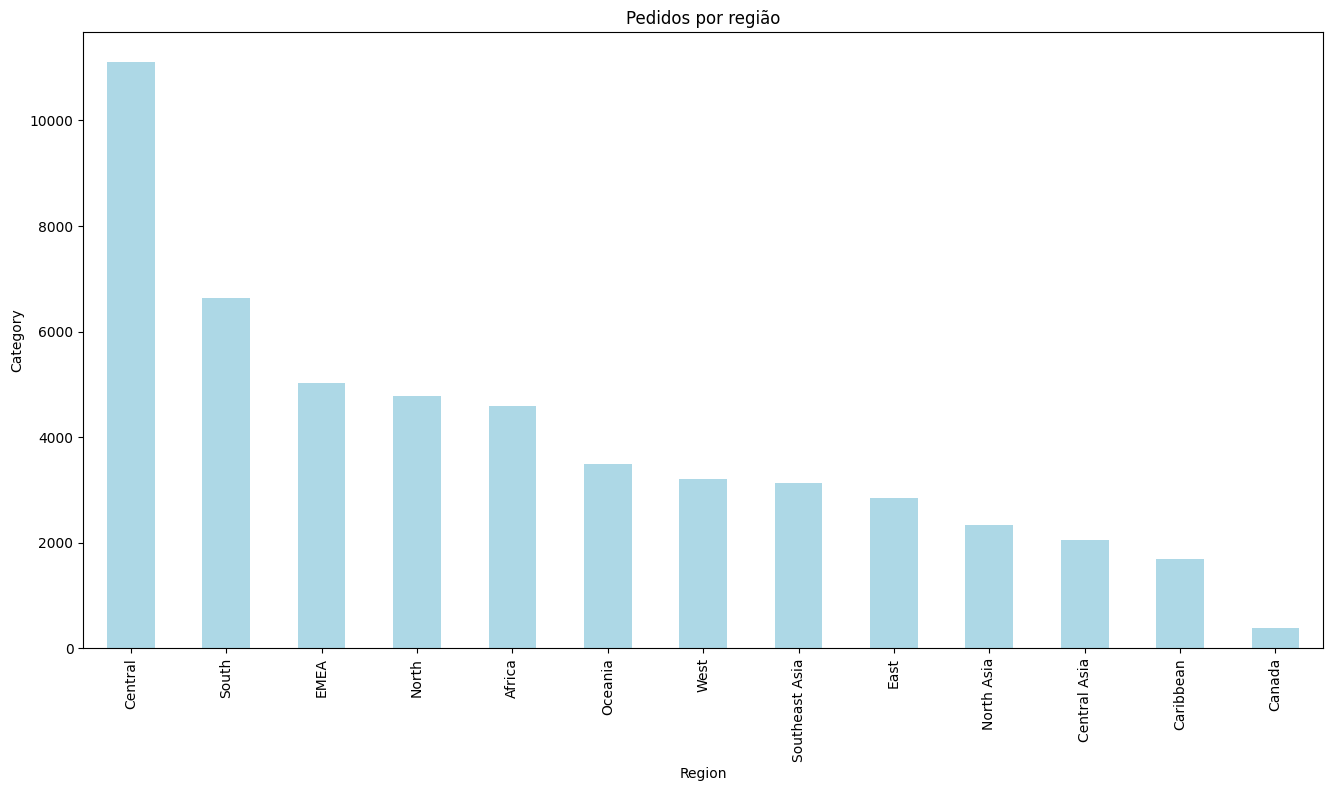

In [ ]:
plt.style.use('default')
plt.figure(figsize=(16,8))
Regions = df.groupby('Region')['Category'].count().sort_values(ascending=False)
Regions = Regions [:30]
Regions.plot(kind='bar', color='lightblue')
plt.title('Pedidos por região')
plt.ylabel('Category')
plt.xlabel('Region')

Text(0, 0.5, 'Order ID')

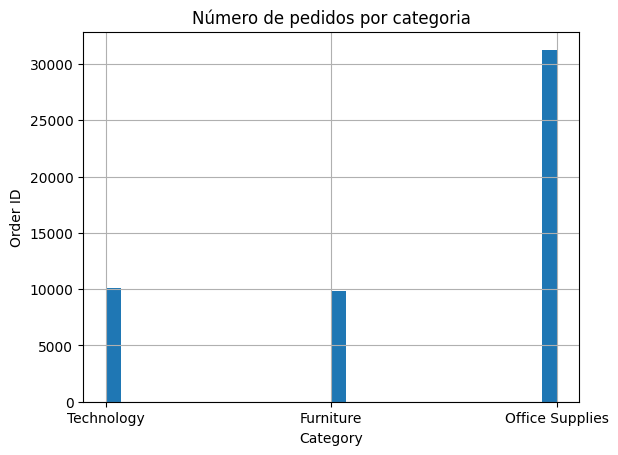

In [ ]:
df.plot = df['Category'].hist(bins=30)
df.plot.set_title('Número de pedidos por categoria')
df.plot.set_xlabel('Category')
df.plot.set_ylabel('Order ID')

Text(0.5, 0, 'Countries')

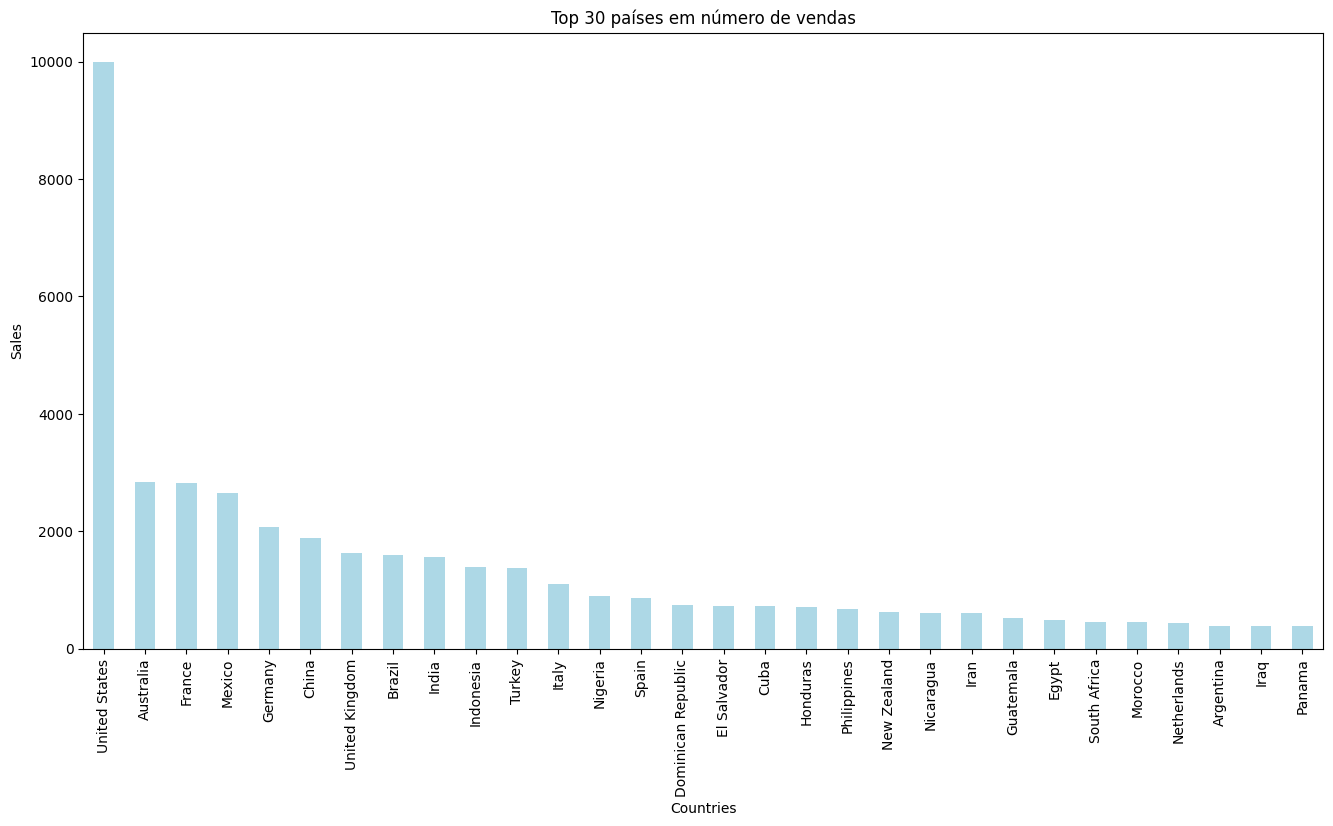

In [ ]:
plt.style.use('default')
plt.figure(figsize=(16,8))
countries = df.groupby('Country')['Sales'].count().sort_values(ascending=False)
countries = countries [:30]
countries.plot(kind='bar', color='lightblue')
plt.title('Top 30 países em número de vendas')
plt.ylabel('Sales')
plt.xlabel('Countries')

In [ ]:
customer_country = pd.DataFrame({'Count' : df.groupby(["Country"]).size()}).reset_index().sort_values('Count',ascending = False).head(10)
customer_country

,Country,Count
139,United States,9993
6,Australia,2835
44,France,2826
81,Mexico,2644
47,Germany,2065
26,China,1880
138,United Kingdom,1633
17,Brazil,1599
57,India,1555
58,Indonesia,1390


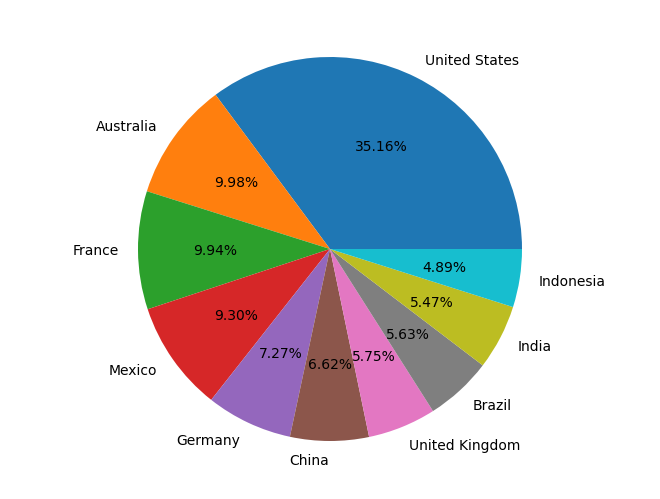

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Countries = customer_country['Country']
cust_count = customer_country['Count']
ax.pie(cust_count, labels = Countries,autopct='%1.2f%%')
plt.show()


## Análise de Correlação x Matriz de Correlação:

In [ ]:
corrMatrix = df.corr()
corrMatrix

,Sales,Quantity,Discount,Profit
Sales,1.00,0.31,-0.09,0.48
Quantity,0.31,1.00,-0.02,0.10
Discount,-0.09,-0.02,1.00,-0.32
Profit,0.48,0.10,-0.32,1.00


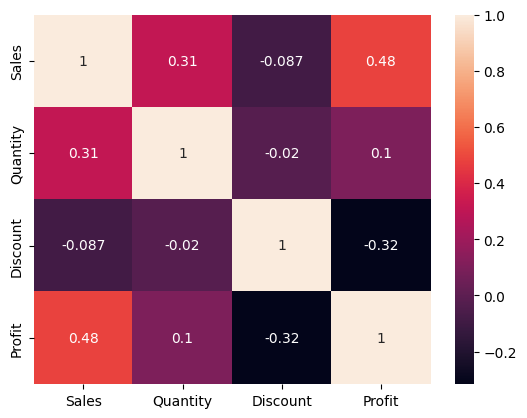

In [ ]:
sns.heatmap(corrMatrix, annot=True)

In [ ]:
# Dados que possuem correlação comparando cada coluna(quantitativa).
corrMatrix[corrMatrix < 1].unstack().transpose()\
    .sort_values(ascending=False)\
    .drop_duplicates()

Profit    Sales       0.48
Quantity  Sales       0.31
Profit    Quantity    0.10
Discount  Quantity   -0.02
          Sales      -0.09
Profit    Discount   -0.32
Sales     Sales        nan
dtype: float64

## Análise dos Boxplot

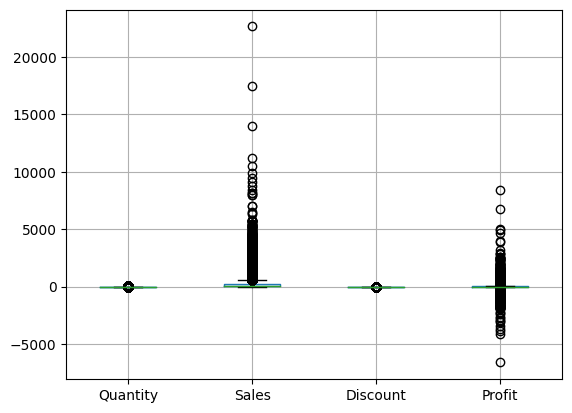

In [ ]:
df.boxplot(column=['Quantity', 'Sales','Discount', 'Profit'])
plt.show()

###Retirando os outliers

In [ ]:
#Analise gross feito porem falta do budget

In [ ]:
#Descrição dos dados de faturamento e orçamento.
df['Quantity'].describe()

count   51,280.00
mean         3.48
std          2.28
min          1.00
25%          2.00
50%          3.00
75%          5.00
max         14.00
Name: Quantity, dtype: float64

In [ ]:
# IQR -> variação (Q3 - Q1)
IQR = np.quantile(df['Quantity'], 0.75) - np.quantile(df['Quantity'], 0.25)
print(f'Box-Plot - IQR: {IQR: .2f}')

Box-Plot - IQR:  3.00


In [ ]:
minimum = np.quantile(df['Quantity'], 0.25) - 1.5 * IQR
print(f'Box-Plot - MÍNIMO: {minimum: .2f}')

Box-Plot - MÍNIMO: -2.50


In [ ]:
maximum = np.quantile(df['Quantity'], 0.75) + 1.5 * IQR
print(f'Box-Plot - MÁXIMO: {maximum: .2f}')

Box-Plot - MÁXIMO:  9.50


In [ ]:
index_bool_outliers = (df['Quantity'] < minimum) | (df['Quantity'] > maximum)
print(f'Total de Outliers: {sum(index_bool_outliers)}')

Total de Outliers: 877


In [ ]:
# Indexes do dataframe
index = np.arange(0, df.shape[0], 1)
index

array([    0,     1,     2, ..., 51277, 51278, 51279])

In [ ]:
# Localização dos outliers
index_outliers = index[index_bool_outliers]
index_outliers

array([    9,    14,    17,    23,    34,    38,    42,    49,    59,
          64,    71,    77,    80,    81,   109,   118,   122,   135,
         140,   149,   152,   157,   181,   201,   204,   213,   215,
         246,   269,   273,   289,   298,   332,   334,   339,   355,
         362,   368,   384,   395,   396,   400,   415,   450,   467,
         476,   482,   496,   505,   512,   547,   548,   560,   576,
         579,   616,   622,   624,   638,   642,   699,   701,   707,
         728,   732,   736,   748,   762,   775,   777,   786,   816,
         839,   843,   863,   870,   893,   912,   918,   935,   953,
         983,   998,  1002,  1015,  1018,  1100,  1130,  1141,  1156,
        1161,  1170,  1185,  1191,  1192,  1223,  1273,  1276,  1314,
        1317,  1318,  1380,  1402,  1417,  1436,  1453,  1460,  1481,
        1492,  1511,  1517,  1524,  1559,  1570,  1605,  1652,  1666,
        1673,  1693,  1763,  1783,  1788,  1795,  1846,  1849,  1868,
        1891,  1894,

In [ ]:
df.reset_index(inplace=True)
df = df.drop(index_outliers)
df.reset_index(inplace=True)
df = df.drop(['index', 'level_0'], axis=1)
df

,Order ID,Ship Mode,Segment,Country,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2012-124891,Same Day,Consumer,United States,East,Technology,Accessories,"2,309.65",7,0.00,762.18
1,IN-2013-77878,Second Class,Corporate,Australia,Oceania,Furniture,Chairs,"3,709.39",9,0.10,-288.76
2,IN-2013-71249,First Class,Consumer,Australia,Oceania,Technology,Phones,"5,175.17",9,0.10,919.97
3,ES-2013-1579342,First Class,Home Office,Germany,Central,Technology,Phones,"2,892.51",5,0.10,-96.54
4,SG-2013-4320,Same Day,Consumer,Senegal,Africa,Technology,Copiers,"2,832.96",8,0.00,311.52
...,...,...,...,...,...,...,...,...,...,...,...
50398,IN-2014-62366,Same Day,Corporate,Japan,North Asia,Office Supplies,Fasteners,65.10,5,0.00,4.50
50399,US-2014-102288,Standard Class,Consumer,United States,Central,Office Supplies,Appliances,0.44,1,0.80,-1.11
50400,US-2013-155768,Same Day,Home Office,United States,West,Office Supplies,Envelopes,22.92,3,0.00,11.23
50401,MX-2012-140767,Standard Class,Home Office,Brazil,South,Office Supplies,Binders,13.44,2,0.00,2.40


In [ ]:
#Descrição dos dados de maior bilheteria.
df['Sales'].describe()

count   50,403.00
mean       238.24
std        465.60
min          0.44
25%         30.24
50%         83.22
75%        245.70
max     22,638.48
Name: Sales, dtype: float64

In [ ]:
# IQR -> variação (Q3 - Q1)
IQR = np.quantile(df['Sales'], 0.75) - np.quantile(df['Sales'], 0.25)
print(f'Box-Plot - IQR: {IQR: .2f}')

Box-Plot - IQR:  215.46


In [ ]:
minimum = np.quantile(df['Sales'], 0.25) - 1.5 * IQR
print(f'Box-Plot - MÍNIMO: {minimum: .2f}')

Box-Plot - MÍNIMO: -292.95


In [ ]:
maximum = np.quantile(df['Sales'], 0.75) + 1.5 * IQR
print(f'Box-Plot - MÁXIMO: {maximum: .2f}')

Box-Plot - MÁXIMO:  568.89


In [ ]:
index_bool_outliers = (df['Sales'] < minimum) | (df['Sales'] > maximum)
print(f'Total de Outliers: {sum(index_bool_outliers)}')


Total de Outliers: 5517


In [ ]:
## Indexes do dataframe
index = np.arange(0, df.shape[0], 1)
index

array([    0,     1,     2, ..., 50400, 50401, 50402])

In [ ]:
#Posição dos outliers
index_outliers = index[index_bool_outliers]
index_outliers

array([    0,     1,     2, ..., 44476, 46253, 49517])

In [ ]:
df = df.drop(index_outliers)
df.reset_index(inplace=True)
df= df.drop(['index'], axis=1)
df

,Order ID,Ship Mode,Segment,Country,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,TZ-2013-3060,Same Day,Corporate,Tanzania,Africa,Office Supplies,Appliances,553.44,8,0.00,16.56
1,ID-2011-74175,First Class,Consumer,Indonesia,Southeast Asia,Technology,Machines,473.85,5,0.17,-5.85
2,MX-2011-126375,First Class,Consumer,Mexico,North,Technology,Machines,533.22,3,0.00,69.30
3,EZ-2014-1650,First Class,Consumer,Czech Republic,EMEA,Furniture,Chairs,457.14,1,0.00,169.14
4,CA-2014-136448,First Class,Consumer,United States,East,Office Supplies,Binders,538.19,2,0.70,-412.62
...,...,...,...,...,...,...,...,...,...,...,...
44881,IN-2014-62366,Same Day,Corporate,Japan,North Asia,Office Supplies,Fasteners,65.10,5,0.00,4.50
44882,US-2014-102288,Standard Class,Consumer,United States,Central,Office Supplies,Appliances,0.44,1,0.80,-1.11
44883,US-2013-155768,Same Day,Home Office,United States,West,Office Supplies,Envelopes,22.92,3,0.00,11.23
44884,MX-2012-140767,Standard Class,Home Office,Brazil,South,Office Supplies,Binders,13.44,2,0.00,2.40


In [ ]:
#Descrição dos dados de maior bilheteria.
df['Discount'].describe()

count   44,886.00
mean         0.15
std          0.22
min          0.00
25%          0.00
50%          0.00
75%          0.20
max          0.85
Name: Discount, dtype: float64

In [ ]:
# IQR -> variação (Q3 - Q1)
IQR = np.quantile(df['Discount'], 0.75) - np.quantile(df['Discount'], 0.25)
print(f'Box-Plot - IQR: {IQR: .2f}')

Box-Plot - IQR:  0.20


In [ ]:
minimum = np.quantile(df['Discount'], 0.25) - 1.5 * IQR
print(f'Box-Plot - MÍNIMO: {minimum: .2f}')

Box-Plot - MÍNIMO: -0.30


In [ ]:
maximum = np.quantile(df['Discount'], 0.75) + 1.5 * IQR
print(f'Box-Plot - MÁXIMO: {maximum: .2f}')

Box-Plot - MÁXIMO:  0.50


In [ ]:
index_bool_outliers = (df['Discount'] < minimum) | (df['Discount'] > maximum)
print(f'Total de Outliers: {sum(index_bool_outliers)}')


Total de Outliers: 3998


In [ ]:
## Indexes do dataframe
index = np.arange(0, df.shape[0], 1)
index

array([    0,     1,     2, ..., 44883, 44884, 44885])

In [ ]:
#Posição dos outliers
index_outliers = index[index_bool_outliers]
index_outliers

array([    4,    20,    35, ..., 44875, 44876, 44882])

In [ ]:
df = df.drop(index_outliers)
df.reset_index(inplace=True)
df= df.drop(['index'], axis=1)
df

,Order ID,Ship Mode,Segment,Country,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,TZ-2013-3060,Same Day,Corporate,Tanzania,Africa,Office Supplies,Appliances,553.44,8,0.00,16.56
1,ID-2011-74175,First Class,Consumer,Indonesia,Southeast Asia,Technology,Machines,473.85,5,0.17,-5.85
2,MX-2011-126375,First Class,Consumer,Mexico,North,Technology,Machines,533.22,3,0.00,69.30
3,EZ-2014-1650,First Class,Consumer,Czech Republic,EMEA,Furniture,Chairs,457.14,1,0.00,169.14
4,ES-2011-4665208,First Class,Corporate,United Kingdom,North,Office Supplies,Appliances,554.53,2,0.10,-0.05
...,...,...,...,...,...,...,...,...,...,...,...
40883,IN-2014-57662,Standard Class,Home Office,Australia,Oceania,Office Supplies,Binders,58.05,5,0.10,19.95
40884,IN-2014-62366,Same Day,Corporate,Japan,North Asia,Office Supplies,Fasteners,65.10,5,0.00,4.50
40885,US-2013-155768,Same Day,Home Office,United States,West,Office Supplies,Envelopes,22.92,3,0.00,11.23
40886,MX-2012-140767,Standard Class,Home Office,Brazil,South,Office Supplies,Binders,13.44,2,0.00,2.40


In [ ]:
#Descrição dos dados de maior bilheteria.
df['Profit'].describe()

count   40,888.00
mean        17.59
std         48.44
min       -522.09
25%          1.76
50%          9.48
75%         29.19
max        284.22
Name: Profit, dtype: float64

In [ ]:
# IQR -> variação (Q3 - Q1)
IQR = np.quantile(df['Profit'], 0.75) - np.quantile(df['Profit'], 0.25)
print(f'Box-Plot - IQR: {IQR: .2f}')

Box-Plot - IQR:  27.43


In [ ]:
minimum = np.quantile(df['Profit'], 0.25) - 1.5 * IQR
print(f'Box-Plot - MÍNIMO: {minimum: .2f}')

Box-Plot - MÍNIMO: -39.38


In [ ]:
maximum = np.quantile(df['Profit'], 0.75) + 1.5 * IQR
print(f'Box-Plot - MÁXIMO: {maximum: .2f}')

Box-Plot - MÁXIMO:  70.33


In [ ]:
index_bool_outliers = (df['Profit'] < minimum) | (df['Profit'] > maximum)
print(f'Total de Outliers: {sum(index_bool_outliers)}')


Total de Outliers: 5767


In [ ]:
## Indexes do dataframe
index = np.arange(0, df.shape[0], 1)
index

array([    0,     1,     2, ..., 40885, 40886, 40887])

In [ ]:
#Posição dos outliers
index_outliers = index[index_bool_outliers]
index_outliers

array([    3,     7,     8, ..., 40584, 40599, 40708])

In [ ]:
df = df.drop(index_outliers)
df.reset_index(inplace=True)
df= df.drop(['index'], axis=1)
df

,Order ID,Ship Mode,Segment,Country,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,TZ-2013-3060,Same Day,Corporate,Tanzania,Africa,Office Supplies,Appliances,553.44,8,0.00,16.56
1,ID-2011-74175,First Class,Consumer,Indonesia,Southeast Asia,Technology,Machines,473.85,5,0.17,-5.85
2,MX-2011-126375,First Class,Consumer,Mexico,North,Technology,Machines,533.22,3,0.00,69.30
3,ES-2011-4665208,First Class,Corporate,United Kingdom,North,Office Supplies,Appliances,554.53,2,0.10,-0.05
4,AL-2013-3830,First Class,Home Office,Albania,EMEA,Technology,Phones,553.92,4,0.00,22.08
...,...,...,...,...,...,...,...,...,...,...,...
35116,IN-2014-57662,Standard Class,Home Office,Australia,Oceania,Office Supplies,Binders,58.05,5,0.10,19.95
35117,IN-2014-62366,Same Day,Corporate,Japan,North Asia,Office Supplies,Fasteners,65.10,5,0.00,4.50
35118,US-2013-155768,Same Day,Home Office,United States,West,Office Supplies,Envelopes,22.92,3,0.00,11.23
35119,MX-2012-140767,Standard Class,Home Office,Brazil,South,Office Supplies,Binders,13.44,2,0.00,2.40


## Mapeamento das variáveis QUALITATIVAS para QUANTITATIVAS:

Das variáveis Qualitativas (STRINGS) que PERMANECEREM como importantes no seu DATASET para a ETAPA: Machine Learning, fazer o MAPEAMENTO: STRINGS para INT.

Contar a unicidade das Variáveis Qualitativas do seu Dataset:

In [ ]:
df.select_dtypes(include=object)

,Order ID,Ship Mode,Segment,Country,Region,Category,Sub-Category
0,TZ-2013-3060,Same Day,Corporate,Tanzania,Africa,Office Supplies,Appliances
1,ID-2011-74175,First Class,Consumer,Indonesia,Southeast Asia,Technology,Machines
2,MX-2011-126375,First Class,Consumer,Mexico,North,Technology,Machines
3,ES-2011-4665208,First Class,Corporate,United Kingdom,North,Office Supplies,Appliances
4,AL-2013-3830,First Class,Home Office,Albania,EMEA,Technology,Phones
...,...,...,...,...,...,...,...
35116,IN-2014-57662,Standard Class,Home Office,Australia,Oceania,Office Supplies,Binders
35117,IN-2014-62366,Same Day,Corporate,Japan,North Asia,Office Supplies,Fasteners
35118,US-2013-155768,Same Day,Home Office,United States,West,Office Supplies,Envelopes
35119,MX-2012-140767,Standard Class,Home Office,Brazil,South,Office Supplies,Binders


In [ ]:
# Retirando colunas inuteis 
df = df.drop(axis=1, columns=['Order ID'])


In [ ]:
df['Ship Mode'].value_counts()

Standard Class    21107
Second Class       7071
First Class        5103
Same Day           1840
Name: Ship Mode, dtype: int64

In [ ]:
df['Segment'].value_counts()

Consumer       18178
Corporate      10585
Home Office     6358
Name: Segment, dtype: int64

In [ ]:
df['Category'].value_counts()

Office Supplies    25108
Furniture           5143
Technology          4870
Name: Category, dtype: int64

In [ ]:
df['Sub-Category'].value_counts()

Binders        4750
Art            4139
Storage        3464
Paper          3130
Furnishings    2466
Labels         2418
Fasteners      2215
Envelopes      2109
Supplies       2082
Accessories    2040
Chairs         1779
Phones         1647
Appliances      801
Bookcases       757
Copiers         592
Machines        591
Tables          141
Name: Sub-Category, dtype: int64

In [ ]:
df['Region'].value_counts()

Central           7779
South             4481
North             3487
Africa            2910
EMEA              2788
West              2518
Oceania           2480
Southeast Asia    2141
East              2046
North Asia        1527
Central Asia      1353
Caribbean         1297
Canada             314
Name: Region, dtype: int64

In [ ]:
df['Country'].value_counts()

United States    7191
Mexico           2057
Australia        2040
France           2013
Germany          1459
                 ... 
Burundi             1
Montenegro          1
Slovenia            1
Eritrea             1
Chad                1
Name: Country, Length: 136, dtype: int64

TRANSFORMAR AS QUALITATIVAS para QUANTITATIVAS: por Indexação Booleana(MASK)

In [ ]:
db_final = df
db_final

,Ship Mode,Segment,Country,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Same Day,Corporate,Tanzania,Africa,Office Supplies,Appliances,553.44,8,0.00,16.56
1,First Class,Consumer,Indonesia,Southeast Asia,Technology,Machines,473.85,5,0.17,-5.85
2,First Class,Consumer,Mexico,North,Technology,Machines,533.22,3,0.00,69.30
3,First Class,Corporate,United Kingdom,North,Office Supplies,Appliances,554.53,2,0.10,-0.05
4,First Class,Home Office,Albania,EMEA,Technology,Phones,553.92,4,0.00,22.08
...,...,...,...,...,...,...,...,...,...,...
35116,Standard Class,Home Office,Australia,Oceania,Office Supplies,Binders,58.05,5,0.10,19.95
35117,Same Day,Corporate,Japan,North Asia,Office Supplies,Fasteners,65.10,5,0.00,4.50
35118,Same Day,Home Office,United States,West,Office Supplies,Envelopes,22.92,3,0.00,11.23
35119,Standard Class,Home Office,Brazil,South,Office Supplies,Binders,13.44,2,0.00,2.40


In [ ]:
# Criação de Dummies inves de Indexação Booleana / Mapeamento com Categorical Codes

# As demais colunas usaremos o Mapeamento Categorico, pois com elas iriamos criar muitas colunas

db_final = pd.concat([db_final, pd.get_dummies(db_final["Ship Mode"])], axis=1) # Ship Mode dummy coding
db_final = db_final.drop(["Ship Mode"], axis=1) # Apagando a coluna original pois não é mais necessaria

db_final = pd.concat([db_final, pd.get_dummies(db_final["Category"])], axis=1) # Category dummy coding
db_final = db_final.drop(["Category"], axis=1) # Apagando a coluna original pois não é mais necessaria

db_final = pd.concat([db_final, pd.get_dummies(db_final["Segment"])], axis=1) # Segment dummy coding
db_final = db_final.drop(["Segment"], axis=1) # Apagando a coluna original pois não é mais necessaria

In [ ]:
# Mapeamento Categorico
categorical_columns = db_final.select_dtypes(['object']).columns
categorical_columns

Index(['Country', 'Region', 'Sub-Category'], dtype='object')

In [ ]:
db_final['Country'] = db_final['Country'].astype('category')
db_final['Region'] = db_final['Region'].astype('category')
db_final['Sub-Category'] = db_final['Sub-Category'].astype('category')

In [ ]:
#Dataframe final com os valores substituidos.

db_final[categorical_columns] = db_final[categorical_columns].apply(lambda x: x.cat.codes)
db_final

,Country,Region,Sub-Category,Sales,Quantity,Discount,Profit,First Class,Same Day,Second Class,Standard Class,Furniture,Office Supplies,Technology,Consumer,Corporate,Home Office
0,123,0,1,553.44,8,0.00,16.56,0,1,0,0,0,1,0,0,1,0
1,58,11,11,473.85,5,0.17,-5.85,1,0,0,0,0,0,1,1,0,0
2,79,7,11,533.22,3,0.00,69.30,1,0,0,0,0,0,1,1,0,0
3,129,7,1,554.53,2,0.10,-0.05,1,0,0,0,0,1,0,0,1,0
4,1,5,13,553.92,4,0.00,22.08,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35116,6,9,3,58.05,5,0.10,19.95,0,0,0,1,0,1,0,0,0,1
35117,65,8,8,65.10,5,0.00,4.50,0,1,0,0,0,1,0,0,1,0
35118,130,12,7,22.92,3,0.00,11.23,0,1,0,0,0,1,0,0,0,1
35119,17,10,3,13.44,2,0.00,2.40,0,0,0,1,0,1,0,0,0,1


# CLUSTERING

In [ ]:
# Pega uma amostra do dataset (caso ele seja muito grande)
db_final = db_final.sample(frac = 0.8)
db_final

,Country,Region,Sub-Category,Sales,Quantity,Discount,Profit,First Class,Same Day,Second Class,Standard Class,Furniture,Office Supplies,Technology,Consumer,Corporate,Home Office
12078,17,10,0,106.16,4,0.00,29.68,0,0,0,1,0,0,1,0,1,0
33182,89,9,3,7.09,2,0.40,-4.31,0,0,1,0,0,1,0,1,0,0
16366,38,3,12,39.64,2,0.00,10.68,0,0,0,1,0,1,0,0,0,1
10143,79,7,0,132.44,7,0.00,7.84,0,0,1,0,0,0,1,1,0,0
23970,26,8,8,31.14,3,0.00,2.43,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,47,3,0,39.54,1,0.00,18.18,0,0,1,0,0,0,1,1,0,0
16069,130,12,14,104.70,1,0.20,6.54,0,0,1,0,0,1,0,0,1,0
31275,17,10,3,15.24,2,0.00,7.16,0,0,0,1,0,1,0,0,1,0
6562,133,10,14,171.36,7,0.40,-34.30,0,0,0,1,0,1,0,1,0,0


In [ ]:
from sklearn.preprocessing import Normalizer
# Não foi usado, nao apresentou diferença dos dados originais
values = Normalizer().fit_transform(db_final.values)
values

array([[0.15169596, 0.08923292, 0.        , ..., 0.        , 0.00892329,
        0.        ],
       [0.98968246, 0.10008025, 0.03336008, ..., 0.01112003, 0.        ,
        0.        ],
       [0.66256087, 0.05230744, 0.20922975, ..., 0.        , 0.        ,
        0.01743581],
       ...,
       [0.64787263, 0.38110155, 0.11433046, ..., 0.        , 0.03811015,
        0.        ],
       [0.60343747, 0.04537124, 0.06351973, ..., 0.00453712, 0.        ,
        0.        ],
       [0.47982241, 0.14763767, 0.18454708, ..., 0.        , 0.01845471,
        0.        ]])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering


# n_clusters= qtd de clusters
# n_init= qtd de vezes que o codigo vai ser rodado para calcular a confiabilidade dos dados
# max_iter= qtd de iteraçoes

values = db_final.values
kmeans = KMeans(n_clusters=2).fit(values)
#y_pred = kmeans.fit(values)
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Modelo AgglomerativeClustering
# Não serviu (trava o Colab)
# clustering = AgglomerativeClustering(n_clusters=2).fit(values)
# labels01 = clustering.labels_
# labels01



In [ ]:
# Modelo 2: Compute Affinity Propagation
# Não serviu (trava o Colab)

# af = AffinityPropagation().fit(values)
# cluster_centers_indices = af.cluster_centers_indices_
# labels = af.labels_

# n_clusters_ = len(cluster_centers_indices)

# # Quantidade automática de clusters: Grupos.
# print(f'Estimated number of clusters (Ajuste Automático): {n_clusters_}')

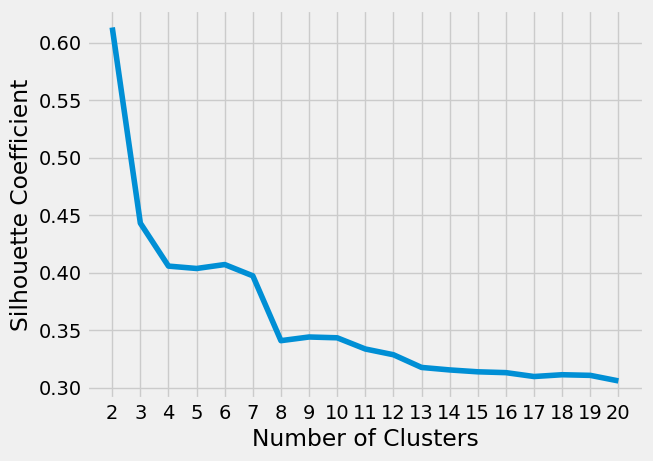

In [ ]:
# Coeficiente de Silhouette é usado para saber a qualidade dos dados para gerar a clusterização.
# O resultado é entre -1 e 1, e se for maior que 0, o valor é bom e podemos prosseguir
# com a clusterização
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for j in range(2, 21):
    km = KMeans(n_clusters=j, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(values)
    score = silhouette_score(values, km.labels_)
    silhouette_coefficients.append(score)


#Plotting
plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), silhouette_coefficients)
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# Fórumula de Davies-Bouldin para saber a qualidade dos dados
from sklearn import metrics

dbs = metrics.davies_bouldin_score(values, labels)
dbs

#Quanto mais perto de 0, melhor é a qualidade dos nossos dados para gerar uma clusterização

0.6790133122936713

In [ ]:
# Fórumula de Calinski Harabasz para saber a qualidade dos dados

calinski = metrics.calinski_harabasz_score(values, labels)
calinski

#Quanto maior o número, melhor

36785.079669657964

## Validando a precisão dos dados

In [ ]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, labels, metric='euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)

  return s, dbs, calinski

In [ ]:
s2, dbs2, calinski2 = clustering_algorithm(2, values)
s2, dbs2, calinski2

(0.6133154323954152, 0.6790701738558229, 36785.080941229615)

In [ ]:
s3, dbs3, calinski3 = clustering_algorithm(3, values)
s3, dbs3, calinski3

(0.441190380574414, 0.8733908405223345, 33661.43460364724)

In [ ]:
s4, dbs4, calinski4 = clustering_algorithm(4, values)
s4, dbs4, calinski4

(0.4057483318846493, 0.8222347819020694, 35671.39370850513)

In [ ]:
s5, dbs5, calinski5 = clustering_algorithm(5, values)
s5, dbs5, calinski5

(0.40389159514846734, 0.8533387462109138, 35701.61954730557)

In [ ]:
s10, dbs10, calinski10 = clustering_algorithm(10, values)
s10, dbs10, calinski10

(0.3433870787200868, 0.9563142416526859, 31149.22222149603)

In [ ]:
db_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28097 entries, 12078 to 22608
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          28097 non-null  int16  
 1   Region           28097 non-null  int8   
 2   Sub-Category     28097 non-null  int8   
 3   Sales            28097 non-null  float64
 4   Quantity         28097 non-null  int64  
 5   Discount         28097 non-null  float64
 6   Profit           28097 non-null  float64
 7   First Class      28097 non-null  uint8  
 8   Same Day         28097 non-null  uint8  
 9   Second Class     28097 non-null  uint8  
 10  Standard Class   28097 non-null  uint8  
 11  Furniture        28097 non-null  uint8  
 12  Office Supplies  28097 non-null  uint8  
 13  Technology       28097 non-null  uint8  
 14  Consumer         28097 non-null  uint8  
 15  Corporate        28097 non-null  uint8  
 16  Home Office      28097 non-null  uint8  
dtypes: float

In [ ]:
import numpy as np

random_data = np.random.rand(28097, 17)  #Qtd de dados / Colunas
s, dbs, calinski = clustering_algorithm(2, random_data)

print(f"Dados gerados aleatoriamente: {s, dbs, calinski}")
print(f"Dados originais: {s2, dbs2, calinski2}")

#Isso mostra que os dados originais oferecem melhor resultado, dando confiabilidade no resultado

Dados gerados aleatoriamente: (0.044735606287545894, 4.579963513223685, 1157.2403455280084)
Dados originais: (0.6133154323954152, 0.6790701738558229, 36785.080941229615)


In [ ]:
set1, set2, set3 = np.array_split(values, 3) # Valores / Qtd de grupos

s1, dbs1, calinski1 = clustering_algorithm(2, set1)
s2, dbs2, calinski2 = clustering_algorithm(2, set2)
s3, dbs3, calinski3 = clustering_algorithm(2, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

#Os valores estão proximos mesmo estando divididos em grupos, isso mostra
# que os dados são estaveis e válidos.

0.6133363062036822 0.6830297572698834 12040.185669040886
0.6120877900001037 0.6794620167548782 12172.812791805029
0.6156594768549664 0.6719258512153731 12572.519699722836


## Gráficos

**Obs: A ordem dos dados vai mudar sempre que rodar o dataset novamente.**

<function matplotlib.pyplot.show>

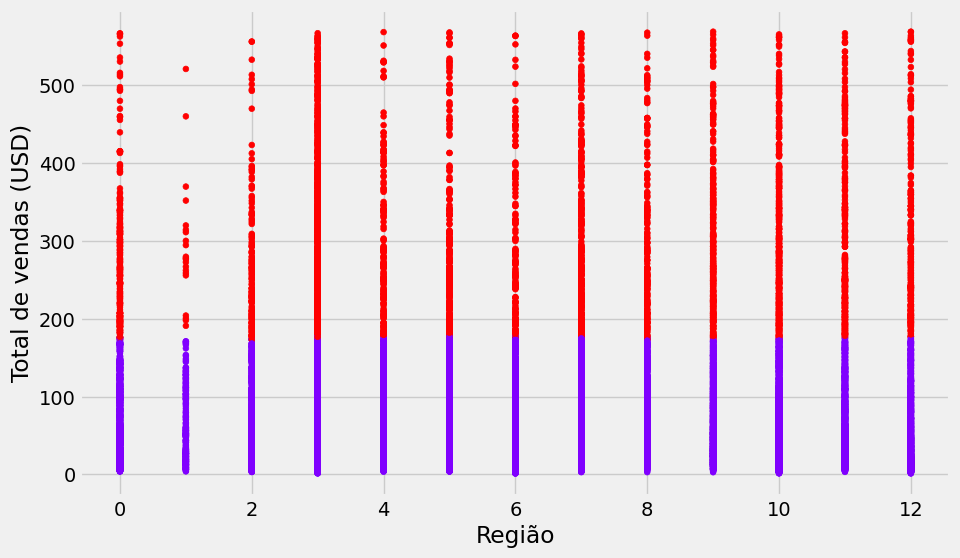

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))

plt.scatter(db_final['Region'], db_final['Sales'], c= labels, s= 17, cmap= 'rainbow', label= labels)
plt.xlabel("Região")
plt.ylabel("Total de vendas (USD)")
plt.show

# A região 3 teve o maior indice de vendas boas
# A região 1 teve poucas vendas, e a maioria delas foram baixas

<function matplotlib.pyplot.show>

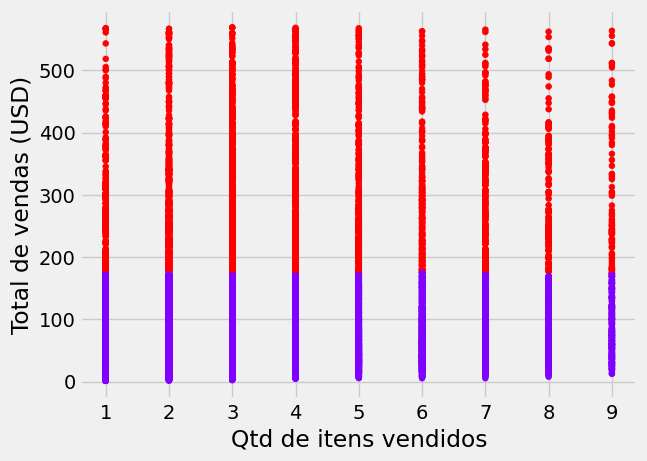

In [ ]:
plt.scatter(db_final['Quantity'], db_final['Sales'], c= labels, s= 17, cmap= 'rainbow', label= labels)
plt.xlabel("Qtd de itens vendidos")
plt.ylabel("Total de vendas (USD)")
plt.show

# A maioria dos clientes compram entre 2 e 7 produtos
# O grupo 1 gosta de comprar itens que custam menos de 200 USD
# O grupo 2 gosta de comprar itens que passam do total de 200 USD

<function matplotlib.pyplot.show>

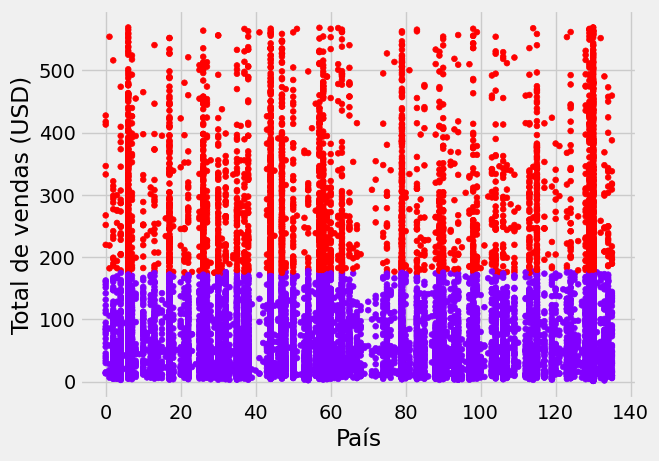

In [ ]:
plt.scatter(db_final['Country'], db_final['Sales'], c= labels, s= 17, cmap= 'rainbow', label= labels)
plt.xlabel("País")
plt.ylabel("Total de vendas (USD)")
plt.show

# A maioria dos países tem o costume de fazer compras menores de 200 USD
# A maioria dos paises fazem poucas compras acima dos 200 USD
# Aproximadamente 5 paises fazem compras constantes

<function matplotlib.pyplot.show>

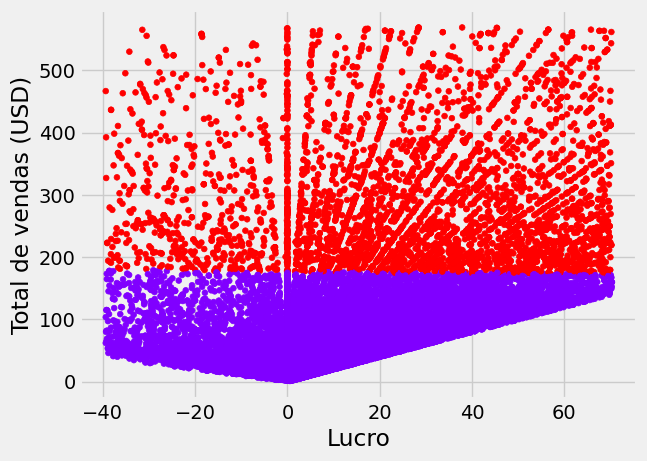

In [ ]:
plt.scatter(db_final['Profit'], db_final['Sales'], c= labels, s= 17, cmap= 'rainbow', label= labels)
plt.xlabel("Lucro")
plt.ylabel("Total de vendas (USD)")
plt.show

# Muitas vendas geraram um lucro constante igual a 0 
# A maioria das vendas geraram lucro positivo em ambos os clusters

In [ ]:
db_final

,Country,Region,Sub-Category,Sales,Quantity,Discount,Profit,First Class,Same Day,Second Class,Standard Class,Furniture,Office Supplies,Technology,Consumer,Corporate,Home Office
12078,17,10,0,106.16,4,0.00,29.68,0,0,0,1,0,0,1,0,1,0
33182,89,9,3,7.09,2,0.40,-4.31,0,0,1,0,0,1,0,1,0,0
16366,38,3,12,39.64,2,0.00,10.68,0,0,0,1,0,1,0,0,0,1
10143,79,7,0,132.44,7,0.00,7.84,0,0,1,0,0,0,1,1,0,0
23970,26,8,8,31.14,3,0.00,2.43,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,47,3,0,39.54,1,0.00,18.18,0,0,1,0,0,0,1,1,0,0
16069,130,12,14,104.70,1,0.20,6.54,0,0,1,0,0,1,0,0,1,0
31275,17,10,3,15.24,2,0.00,7.16,0,0,0,1,0,1,0,0,1,0
6562,133,10,14,171.36,7,0.40,-34.30,0,0,0,1,0,1,0,1,0,0


In [ ]:
import seaborn as sns

db_final["cluster"] = labels
description = db_final.groupby("cluster")[["Sales","Profit","Quantity","Discount"]]
n_sales = description.size()
description = description.mean()
description['n_sales'] = n_sales
description

# O cluster 0 teve muitas vendas, porem com produtos de valores baixos. E seu lucro foi baixo
# O cluster 1 teve poucas vendas, porem teve o maior lucro pois vendeu produtos mais caros

,Sales,Profit,Quantity,Discount,n_sales
cluster,,,,,
0,58.40,10.46,2.96,0.09,23930
1,293.79,26.81,3.77,0.08,4167


In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[7.50433347e+01, 6.10781446e+00, 7.50568324e+00, 5.84012046e+01,
        2.96351860e+00, 9.16015880e-02, 1.04616271e+01, 1.46218136e-01,
        5.30714584e-02, 2.01629753e-01, 5.99080652e-01, 1.14709570e-01,
        7.84412871e-01, 1.00877560e-01, 5.17634768e-01, 3.00501463e-01,
        1.81863769e-01],
       [7.05793137e+01, 6.33381329e+00, 7.74826014e+00, 2.93793257e+02,
        3.76625870e+00, 8.16045116e-02, 2.68074147e+01, 1.36309095e-01,
        5.01559875e-02, 1.91744660e-01, 6.21790257e-01, 3.23014159e-01,
        3.26853852e-01, 3.50131989e-01, 5.20518359e-01, 3.08855292e-01,
        1.70626350e-01]])

In [ ]:
# Usamos o critério de variancia para escolher os melhores (os maiores valores pois eles tem maior relevancia).
max = len(centroids[0])
for i in range(max):
  print(db_final.columns.values[i], f"\n{centroids[:, i].var():.4f}") # var -> variancia

Country 
4.9819
Region 
0.0128
Sub-Category 
0.0147
Sales 
13852.3545
Quantity 
0.1611
Discount 
0.0000
Profit 
66.7962
First Class 
0.0000
Same Day 
0.0000
Second Class 
0.0000
Standard Class 
0.0001
Furniture 
0.0108
Office Supplies 
0.0523
Technology 
0.0155
Consumer 
0.0000
Corporate 
0.0000
Home Office 
0.0000


Usamos o critério de variancia para escolher os melhores (os maiores valores pois eles tem maior relevancia) valores para usar inves das 17 colunas:


Country 
5.1018

---
Sales 
13706.4443

---
Quantity 
0.1696

---
Profit 
64.0437

---
Furniture 
0.0114

---
Office Supplies 
0.0519

---
Technology 
0.0146

---



In [ ]:
# Resumo usando média
description = db_final.groupby("cluster")[["Sales","Profit","Country","Quantity","Office Supplies","Furniture","Technology"]]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

,Sales,Profit,Country,Quantity,Office Supplies,Furniture,Technology,n_clients
cluster,,,,,,,,
0,58.40,10.46,75.04,2.96,0.78,0.11,0.10,23930
1,293.79,26.81,70.58,3.77,0.33,0.32,0.35,4167


# Medindo a precisão com Classificação

In [ ]:
# Bibliotecas para o Modelo Classificador
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
%matplotlib inline
from IPython.display import Image
from sklearn.metrics import confusion_matrix

In [ ]:
# Treinamento / Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle = True)
# iterate over classifiers
for name, clf in zip(names, classifiers):
  # Treinamento: Ajuste dos modelos
  clf.fit(X_train, y_train)
  # Teste: score
  score = clf.score(X_test, y_test)
  print(f'The accuracy of {name} is: {score * 100:.3f} %')

The accuracy of Nearest Neighbors is: 99.703 %
The accuracy of Linear SVM is: 99.988 %
The accuracy of RBF SVM is: 85.516 %
The accuracy of Decision Tree is: 100.000 %
The accuracy of Random Forest is: 97.829 %
The accuracy of AdaBoost is: 100.000 %
The accuracy of Naive Bayes is: 100.000 %


In [ ]:


# Amostra nova por Simulação: sample 
x0 = np.random.normal(db_final.iloc[:,0].mean(), db_final.iloc[:,0].std(), 1)
x1 = np.random.normal(db_final.iloc[:, 1].mean(), db_final.iloc[:, 1].std(), 1)
x2 = np.random.normal(db_final.iloc[:, 2].mean(), db_final.iloc[:, 2].std(), 1)
x3 = np.random.normal(db_final.iloc[:, 3].mean(), db_final.iloc[:, 3].std(), 1)
x4 = np.random.normal(db_final.iloc[:, 4].mean(), db_final.iloc[:, 4].std(), 1)
x5 = np.random.normal(db_final.iloc[:, 5].mean(), db_final.iloc[:, 5].std(), 1)
x6 = np.random.normal(db_final.iloc[:, 6].mean(), db_final.iloc[:, 6].std(), 1)
x7 = np.random.normal(db_final.iloc[:, 7].mean(), db_final.iloc[:, 7].std(), 1)
x8 = np.random.normal(db_final.iloc[:, 8].mean(), db_final.iloc[:, 8].std(), 1)
x9 = np.random.normal(db_final.iloc[:, 9].mean(), db_final.iloc[:, 9].std(), 1)
x10 = np.random.normal(db_final.iloc[:, 10].mean(), db_final.iloc[:, 10].std(), 1)
x11 = np.random.normal(db_final.iloc[:, 11].mean(), db_final.iloc[:, 11].std(), 1)
x12 = np.random.normal(db_final.iloc[:, 12].mean(), db_final.iloc[:, 12].std(), 1)
x13 = np.random.normal(db_final.iloc[:, 13].mean(), db_final.iloc[:, 13].std(), 1)
x14 = np.random.normal(db_final.iloc[:, 14].mean(), db_final.iloc[:, 14].std(), 1)
x15 = np.random.normal(db_final.iloc[:, 15].mean(), db_final.iloc[:, 15].std(), 1)
x16 = np.random.normal(db_final.iloc[:, 16].mean(), db_final.iloc[:, 16].std(), 1)
x17 = np.random.normal(db_final.iloc[:, 17].mean(), db_final.iloc[:, 17].std(), 1)

# Amostra nova por Simulação: sample1
sample = np.array([x0, x1,	x2,	x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13,
                   x14, x15, x16,x17])

# Amostra nova: sample1 aplicado ao Modelo RandomForest
clf = classifiers[5]
y = clf.predict(sample.reshape(1, -1))
amostra = y[0]
print(amostra)
print([x0, x1,	x2,	x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13,
       x14, x15, x16,x17])

1
[array([8.34090491]), array([2.49699572]), array([8.15280514]), array([80.9584005]), array([1.5122558]), array([-0.00137189]), array([19.43886389]), array([0.48157319]), array([-0.37837344]), array([0.27396625]), array([1.36607435]), array([0.12398353]), array([0.37863982]), array([0.25946756]), array([0.34440197]), array([0.21660457]), array([0.18152514]), array([0.7944695])]
